In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stumpy as sp
import scipy.stats as stats
from scipy.stats import *
from matplotlib.patches import Rectangle

# Read in the data
df = pd.read_csv('2-7-Best-QQQ-2013-2023-copy.csv')

In [57]:
df.head()

,Date Opened,Time Opened,Opening Price,Legs,Premium,Closing Price,Date Closed,Time Closed,Avg. Closing Cost,Reason For Close,...,Margin Req.,Strategy,Opening Commissions + Fees,Closing Commissions + Fees,Opening VIX,Closing VIX,Gap,Movement,Max Profit,Max Loss
0,2024-01-18,11:00:00,411.92,172 Jan 18 408 C BTO 4.00 | 172 Jan 18 404 P B...,-405,411.49,2024-01-18,12:04:00,-363,VIX9D Move Up,...,69660,NaN,223.6,223.6,14.33,14.52,3.31,1.40,23.70,-15.80
1,2024-01-16,11:00:00,410.63,197 Jan 16 407 C BTO 3.74 | 197 Jan 16 402 P B...,-378,409.53,2024-01-16,11:01:00,-280,VIX9D Move Up,...,74466,NaN,256.1,256.1,13.58,13.77,-1.25,2.32,0.00,-25.40
2,2024-01-10,11:00:00,407.34,168 Jan 10 403 C BTO 4.39 | 168 Jan 10 399 P B...,-443,407.44,2024-01-10,13:02:00,-446,VIX9D Move Up,...,74424,NaN,218.4,218.4,12.71,12.89,0.32,1.27,8.80,-19.64
3,2024-01-09,11:00:00,403.46,174 Jan 9 399.78 C BTO 3.71 | 174 Jan 9 395 P ...,-375,405.71,2024-01-09,15:00:00,-591,Exited at Specified Time,...,65250,NaN,226.2,226.2,13.24,12.85,-3.04,1.55,82.93,0.00
4,2024-01-08,11:00:00,401.50,144 Jan 8 397.78 C BTO 3.76 | 144 Jan 8 393 P ...,-380,404.55,2024-01-08,15:00:00,-676,Exited at Specified Time,...,54720,NaN,187.2,187.2,13.54,13.16,1.24,3.51,83.42,-7.63


In [58]:
df = df.iloc[::-1]



In [59]:
df_copy = df.copy()

In [60]:
df_copy = df_copy.reset_index(drop=True)
# select columns ["Closing Price", "Opening Price", "P/L", "Opening VIX", "Closing VIX", "Margin Req."]
df_copy = df_copy[["Date Opened", "Closing Price", "Opening Price", "P/L", "Opening VIX", "Closing VIX", "Margin Req."]]


In [61]:
df_copy.head()

,Date Opened,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.
0,2013-02-08,68.02,68.09,-6084.0,12.90,12.99,24960
1,2013-03-01,67.36,67.32,-982.8,15.29,15.38,23478
2,2013-03-22,68.50,68.29,3422.4,13.45,13.56,23184
3,2013-03-28,68.92,68.89,-1191.4,12.55,12.90,24087
4,2013-04-05,67.67,67.57,519.4,14.76,14.37,23744


In [62]:
# set index to "Date Opened"
# convert "Date Opened" to datetime
df_copy = df_copy.set_index("Date Opened")
df_copy.index = pd.to_datetime(df_copy.index)

df_copy.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.
Date Opened,,,,,,
2013-02-08,68.02,68.09,-6084.0,12.90,12.99,24960
2013-03-01,67.36,67.32,-982.8,15.29,15.38,23478
2013-03-22,68.50,68.29,3422.4,13.45,13.56,23184
2013-03-28,68.92,68.89,-1191.4,12.55,12.90,24087
2013-04-05,67.67,67.57,519.4,14.76,14.37,23744


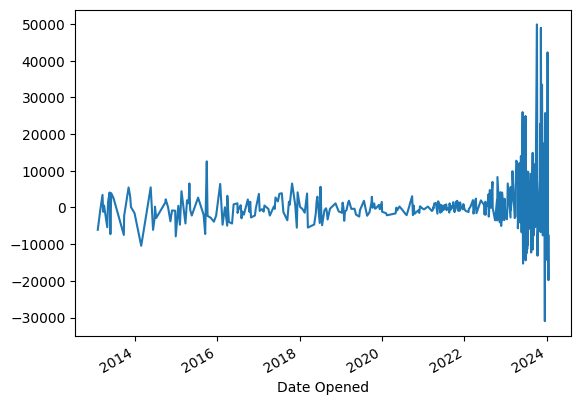

In [63]:
# plot P/L over time
df_copy["P/L"].plot()
plt.show()

In [110]:
m = 100
mp = sp.stump(df_copy["P/L"], m)

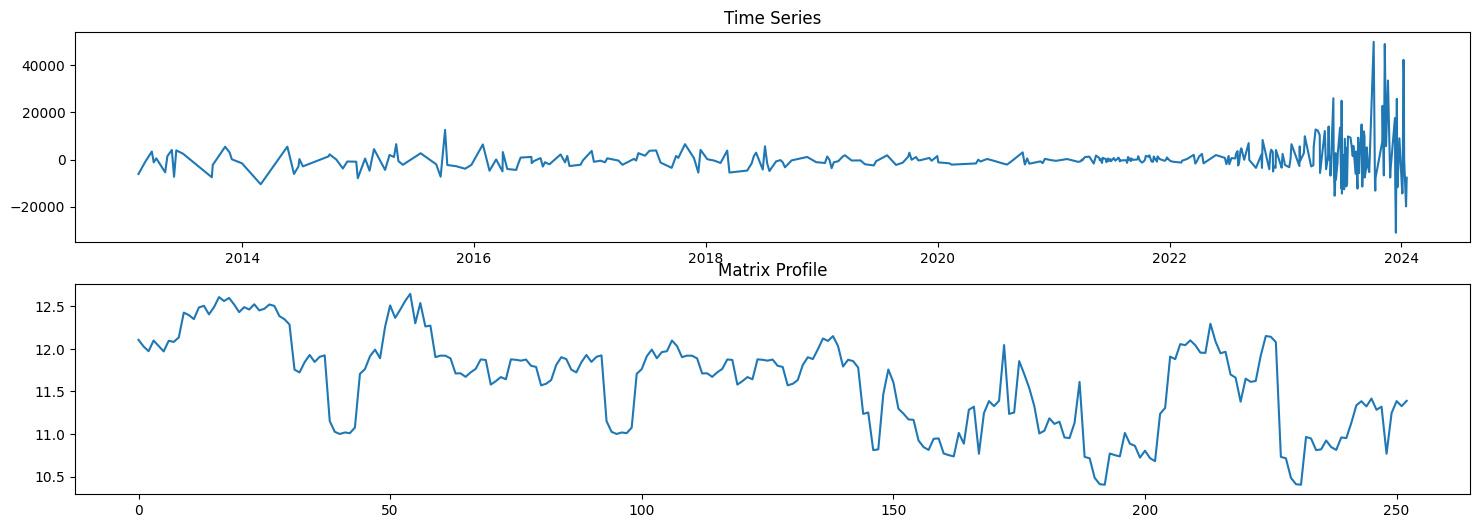

In [111]:
plt.figure(figsize=(18, 6))
plt.subplot(2, 1, 1)
plt.plot(df_copy['P/L'])
plt.title('Time Series')
plt.subplot(2, 1, 2)
plt.plot(mp[:,0])
plt.title('Matrix Profile')
plt.show()

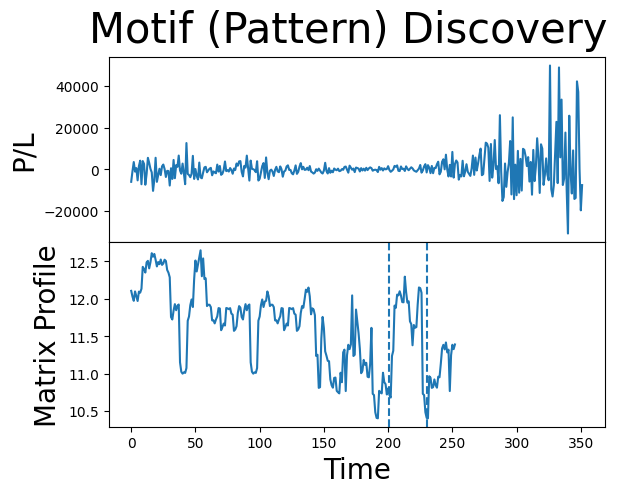

In [119]:
top_n = np.argsort(mp[:, 0])[9]
nn_idx = mp[top_n, 1]

fig, axs = plt.subplots(2, sharex=True, gridspec_kw={'hspace': 0})
plt.suptitle('Motif (Pattern) Discovery', fontsize='30')

axs[0].plot(df_copy['P/L'].values)
axs[0].set_ylabel('P/L', fontsize='20')
rect = Rectangle((top_n, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
rect = Rectangle((nn_idx, 0), m, 40, facecolor='lightgrey')
axs[0].add_patch(rect)
axs[1].set_xlabel('Time', fontsize ='20')
axs[1].set_ylabel('Matrix Profile', fontsize='20')
axs[1].axvline(x=top_n, linestyle="dashed")
axs[1].axvline(x=nn_idx, linestyle="dashed")
axs[1].plot(mp[:, 0])
plt.show()

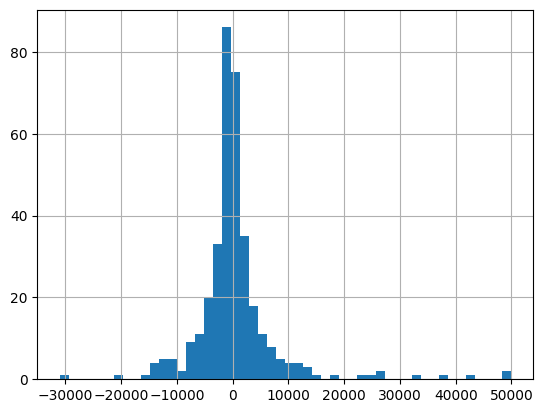

In [64]:
# plot distribution of P/L
df_copy["P/L"].hist(bins=50)
plt.show()

In [76]:
# create copy df for log transform

df_log = df_copy.copy()

# find minimum values of each column
df_min = df_log.min()

# store the absolute value of the minimum value of each column
df_abs_min = abs(df_log.min())

# log transform each absolute minimum value
df_log_min = np.log(df_abs_min + 1)

# add minimum value to each column
df_log = df_log + abs(df_log.min()) + 1

# log transform each column
df_log = np.log(df_log)

# subtract the log transformed minimum value from each column
df_log = df_log - df_log_min

df_log.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.
Date Opened,,,,,,
2013-02-08,0.690657,0.691463,-0.218658,0.822404,0.815880,2.344642
2013-03-01,0.685806,0.685802,-0.032241,0.921224,0.913569,2.289466
2013-03-22,0.694171,0.692928,0.104794,0.846025,0.840060,2.278148
2013-03-28,0.697235,0.697310,-0.039220,0.807076,0.812008,2.312509
2013-04-05,0.688088,0.687643,0.016628,0.900137,0.873444,2.299596


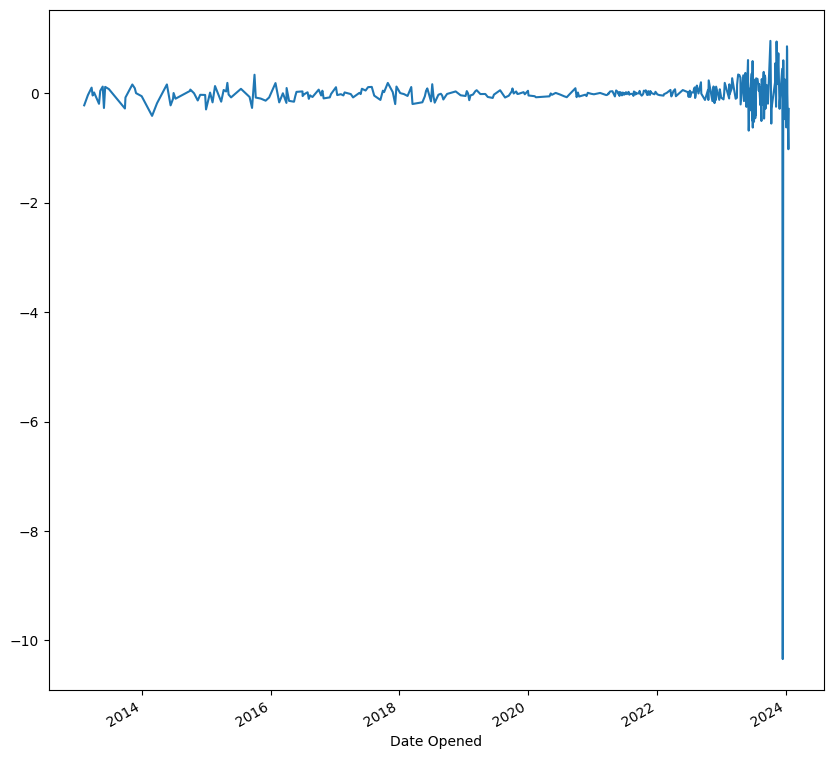

In [96]:
# plot P/L over time
# set size of plot to 10x20
plt.figure(figsize=(10,10))
df_log["P/L"].plot()
plt.show()

In [65]:
# create copy of df_copy for cbrt transformation
df_cbrt = df_copy.copy()

# cbrt transformation
df_cbrt["Closing Price"] = np.cbrt(df_cbrt["Closing Price"])
df_cbrt["Opening Price"] = np.cbrt(df_cbrt["Opening Price"])
df_cbrt["P/L"] = np.cbrt(df_cbrt["P/L"])
df_cbrt["Opening VIX"] = np.cbrt(df_cbrt["Opening VIX"])
df_cbrt["Closing VIX"] = np.cbrt(df_cbrt["Closing VIX"])
df_cbrt["Margin Req."] = np.cbrt(df_cbrt["Margin Req."])

df_cbrt.head()


,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.
Date Opened,,,,,,
2013-02-08,4.082055,4.083455,-18.255612,2.345290,2.350732,29.224574
2013-03-01,4.068810,4.068004,-9.942335,2.482004,2.486864,28.634330
2013-03-22,4.091635,4.087449,15.069896,2.378158,2.384624,28.514305
2013-03-28,4.099980,4.099385,-10.601139,2.323885,2.345290,28.879804
2013-04-05,4.075042,4.073033,8.038357,2.452988,2.431190,28.742065


In [78]:
# create copy of df_log for cube root transformation
df_log_cbrt = df_log.copy()

# cube root transformation
df_log_cbrt["Closing Price"] = np.cbrt(df_log_cbrt["Closing Price"])
df_log_cbrt["Opening Price"] = np.cbrt(df_log_cbrt["Opening Price"])
df_log_cbrt["P/L"] = np.cbrt(df_log_cbrt["P/L"])
df_log_cbrt["Opening VIX"] = np.cbrt(df_log_cbrt["Opening VIX"])
df_log_cbrt["Closing VIX"] = np.cbrt(df_log_cbrt["Closing VIX"])
df_log_cbrt["Margin Req."] = np.cbrt(df_log_cbrt["Margin Req."])

df_log_cbrt.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.
Date Opened,,,,,,
2013-02-08,0.883936,0.884279,-0.602451,0.936904,0.934420,1.328492
2013-03-01,0.881862,0.881860,-0.318275,0.973020,0.970317,1.317988
2013-03-22,0.885432,0.884904,0.471461,0.945789,0.943561,1.315812
2013-03-28,0.886733,0.886765,-0.339757,0.931047,0.932940,1.322395
2013-04-05,0.882838,0.882648,0.255240,0.965538,0.955898,1.319929


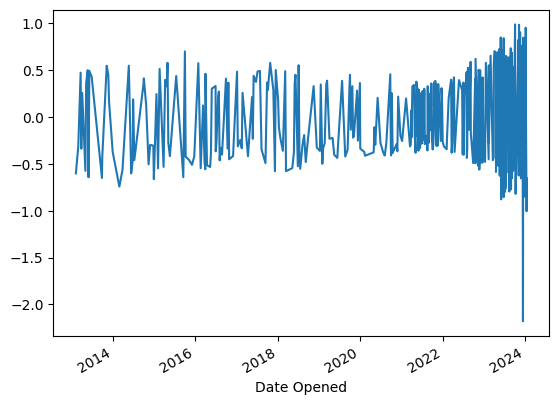

In [79]:
# plot P/L over time
df_log_cbrt["P/L"].plot()
plt.show()


In [66]:
# create copy df of pct_change
df_pct = df_cbrt.copy()

# pct_change
df_pct = df_pct.pct_change()
df_pct = df_pct.dropna()

df_pct.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.
Date Opened,,,,,,
2013-03-01,-0.003245,-0.003784,-0.455382,0.058293,0.057911,-0.020197
2013-03-22,0.005610,0.004780,-2.515730,-0.041839,-0.041112,-0.004192
2013-03-28,0.002040,0.002920,-1.703465,-0.022822,-0.016495,0.012818
2013-04-05,-0.006083,-0.006428,-1.758254,0.055555,0.036627,-0.004769
2013-05-03,0.021551,0.022527,-3.180607,-0.041932,-0.035083,0.001738


In [80]:
# create copy df of df_log_cbrt for pct_change
df_log_cbrt_pct = df_log_cbrt.copy()

# pct_change
df_log_cbrt_pct = df_log_cbrt_pct.pct_change()
df_log_cbrt_pct = df_log_cbrt_pct.dropna()

df_log_cbrt_pct.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.
Date Opened,,,,,,
2013-03-01,-0.002347,-0.002736,-0.471700,0.038548,0.038417,-0.007907
2013-03-22,0.004049,0.003452,-2.481300,-0.027986,-0.027575,-0.001650
2013-03-28,0.001469,0.002104,-1.720648,-0.015588,-0.011257,0.005003
2013-04-05,-0.004392,-0.004643,-1.751242,0.037046,0.024609,-0.001865
2013-05-03,0.015424,0.016118,-3.256248,-0.028293,-0.023845,0.000679


In [67]:
# create aditiional column for time since last trade
df_pct["Time Since Last Trade"] = df_pct.index.to_series().diff().dt.days
df_pct["Time Since Last Trade"] = df_pct["Time Since Last Trade"].fillna(0)

df_pct.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.,Time Since Last Trade
Date Opened,,,,,,,
2013-03-01,-0.003245,-0.003784,-0.455382,0.058293,0.057911,-0.020197,0.0
2013-03-22,0.005610,0.004780,-2.515730,-0.041839,-0.041112,-0.004192,21.0
2013-03-28,0.002040,0.002920,-1.703465,-0.022822,-0.016495,0.012818,6.0
2013-04-05,-0.006083,-0.006428,-1.758254,0.055555,0.036627,-0.004769,8.0
2013-05-03,0.021551,0.022527,-3.180607,-0.041932,-0.035083,0.001738,28.0


In [82]:
# create aditiional column for time since last trade for df_log_cbrt_pct
df_log_cbrt_pct["Time Since Last Trade"] = df_log_cbrt_pct.index.to_series().diff().dt.days
df_log_cbrt_pct["Time Since Last Trade"] = df_log_cbrt_pct["Time Since Last Trade"].fillna(0)

df_log_cbrt_pct.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.,Time Since Last Trade
Date Opened,,,,,,,
2013-03-01,-0.002347,-0.002736,-0.471700,0.038548,0.038417,-0.007907,0.0
2013-03-22,0.004049,0.003452,-2.481300,-0.027986,-0.027575,-0.001650,21.0
2013-03-28,0.001469,0.002104,-1.720648,-0.015588,-0.011257,0.005003,6.0
2013-04-05,-0.004392,-0.004643,-1.751242,0.037046,0.024609,-0.001865,8.0
2013-05-03,0.015424,0.016118,-3.256248,-0.028293,-0.023845,0.000679,28.0


In [68]:
# delete first row
df_pct = df_pct.iloc[1:]

df_pct.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.,Time Since Last Trade
Date Opened,,,,,,,
2013-03-22,0.005610,0.004780,-2.515730,-0.041839,-0.041112,-0.004192,21.0
2013-03-28,0.002040,0.002920,-1.703465,-0.022822,-0.016495,0.012818,6.0
2013-04-05,-0.006083,-0.006428,-1.758254,0.055555,0.036627,-0.004769,8.0
2013-05-03,0.021551,0.022527,-3.180607,-0.041932,-0.035083,0.001738,28.0
2013-05-10,0.003591,0.002577,-1.645305,0.006886,0.002061,-0.019308,7.0


In [83]:
# delete first row for df_log_cbrt_pct
df_log_cbrt_pct = df_log_cbrt_pct.iloc[1:]

df_log_cbrt_pct.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.,Time Since Last Trade
Date Opened,,,,,,,
2013-03-22,0.004049,0.003452,-2.481300,-0.027986,-0.027575,-0.001650,21.0
2013-03-28,0.001469,0.002104,-1.720648,-0.015588,-0.011257,0.005003,6.0
2013-04-05,-0.004392,-0.004643,-1.751242,0.037046,0.024609,-0.001865,8.0
2013-05-03,0.015424,0.016118,-3.256248,-0.028293,-0.023845,0.000679,28.0
2013-05-10,0.002555,0.001834,-1.620645,0.004670,0.001410,-0.007652,7.0


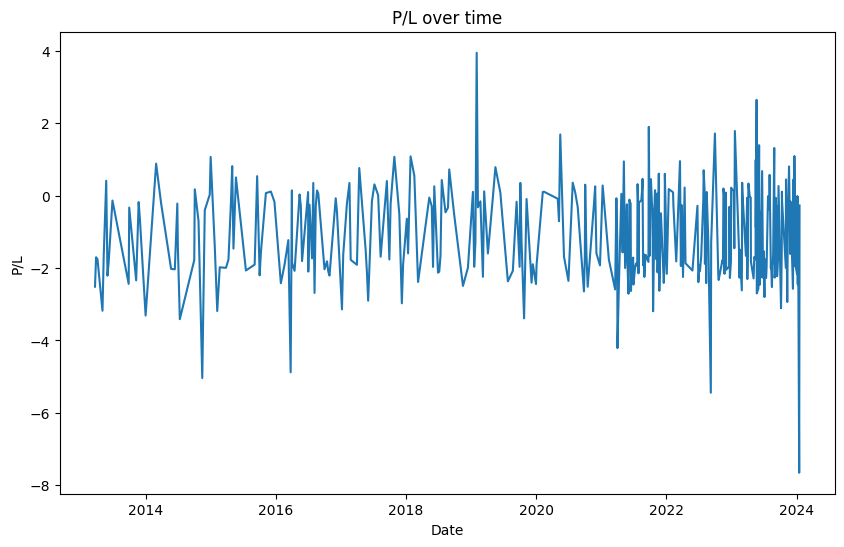

In [84]:
# plot P/L over time
plt.figure(figsize=(10, 6))
plt.plot(df_pct["P/L"])
plt.title("P/L over time")
plt.xlabel("Date")
plt.ylabel("P/L")
plt.show()

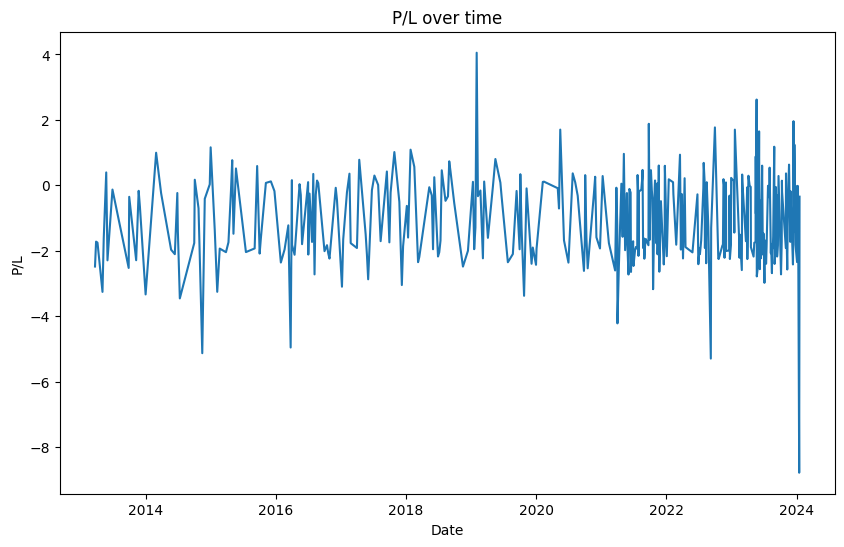

In [85]:
# plot P/L over time for df_log_cbrt_pct
plt.figure(figsize=(10, 6))
plt.plot(df_log_cbrt_pct["P/L"])
plt.title("P/L over time")
plt.xlabel("Date")
plt.ylabel("P/L")
plt.show()

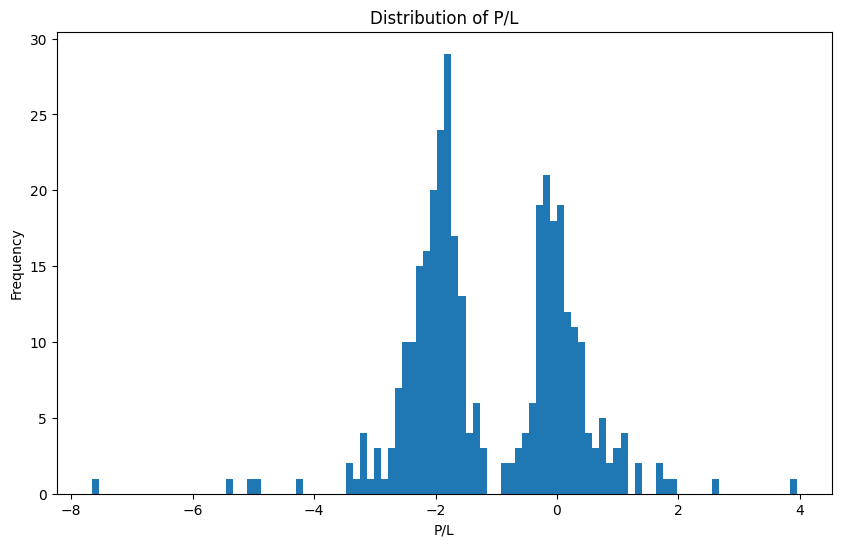

In [70]:
# plot distribution of P/L
plt.figure(figsize=(10, 6))
plt.hist(df_pct["P/L"], bins=100)
plt.title("Distribution of P/L")
plt.xlabel("P/L")
plt.ylabel("Frequency")
plt.show()

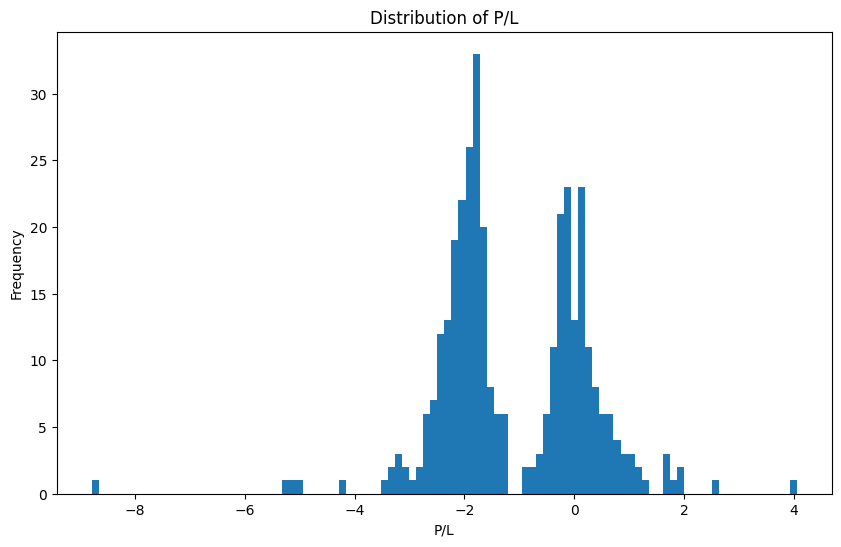

In [86]:
# plot distribution of P/L for df_log_cbrt_pct
plt.figure(figsize=(10, 6))
plt.hist(df_log_cbrt_pct["P/L"], bins=100)
plt.title("Distribution of P/L")
plt.xlabel("P/L")
plt.ylabel("Frequency")
plt.show()

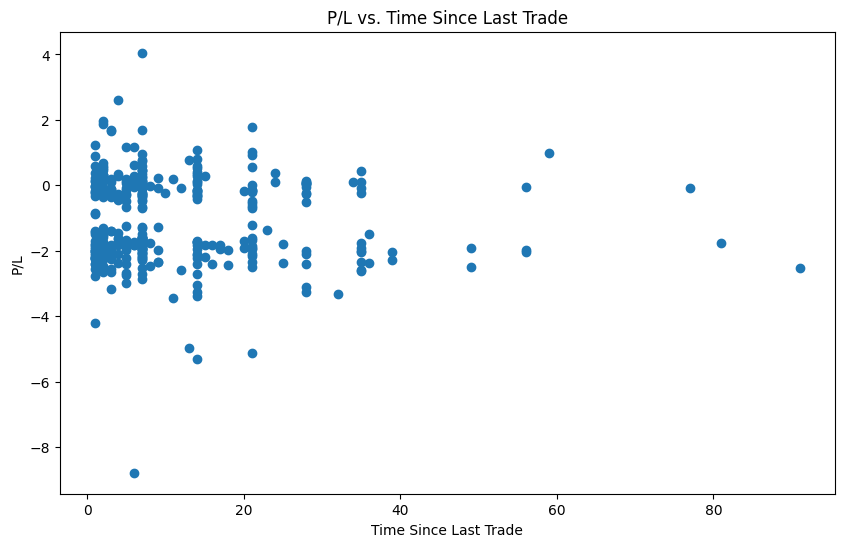

In [87]:
# create scatter plot of P/L vs. time since last trade for df_log_cbrt_pct
plt.figure(figsize=(10, 6))
plt.scatter(df_log_cbrt_pct["Time Since Last Trade"], df_log_cbrt_pct["P/L"])
plt.title("P/L vs. Time Since Last Trade")
plt.xlabel("Time Since Last Trade")
plt.ylabel("P/L")
plt.show()


In [72]:
# create copy df to analyse rolling skewness and standard deviation of P/L vs time since last trade
df_roll = df_pct.copy()

# create rolling window of 30 days
roll_window = 5

# calculate rolling skewness
df_roll["Rolling Skewness"] = df_roll["P/L"].rolling(window=roll_window).skew()

# calculate rolling standard deviation
df_roll["Rolling Std"] = df_roll["P/L"].rolling(window=roll_window).std()

df_roll.dropna(inplace=True)

df_roll.head()

,Closing Price,Opening Price,P/L,Opening VIX,Closing VIX,Margin Req.,Time Since Last Trade,Rolling Skewness,Rolling Std
Date Opened,,,,,,,,,
2013-05-10,0.003591,0.002577,-1.645305,0.006886,0.002061,-0.019308,7.0,-1.112762,0.671363
2013-05-24,0.001643,0.001372,0.412819,0.033341,0.031099,0.005888,14.0,0.731178,1.283007
2013-05-31,0.001771,0.003635,-2.211911,0.003861,0.029990,0.013832,7.0,1.018924,1.315476
2013-06-07,-0.002040,-0.004031,-1.812746,0.014440,-0.004952,-0.025069,7.0,1.057471,1.316547
2013-06-28,-0.007985,-0.007823,-0.135564,0.023411,0.025440,0.013717,21.0,0.586598,1.146534


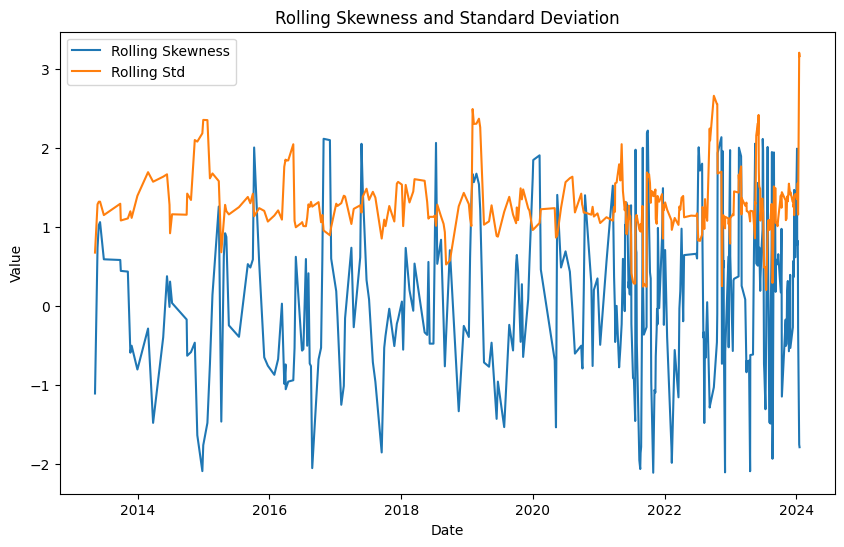

In [73]:
# plot rolling skewness and standard deviation
plt.figure(figsize=(10, 6))
plt.plot(df_roll["Rolling Skewness"], label="Rolling Skewness")
plt.plot(df_roll["Rolling Std"], label="Rolling Std")
plt.title("Rolling Skewness and Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


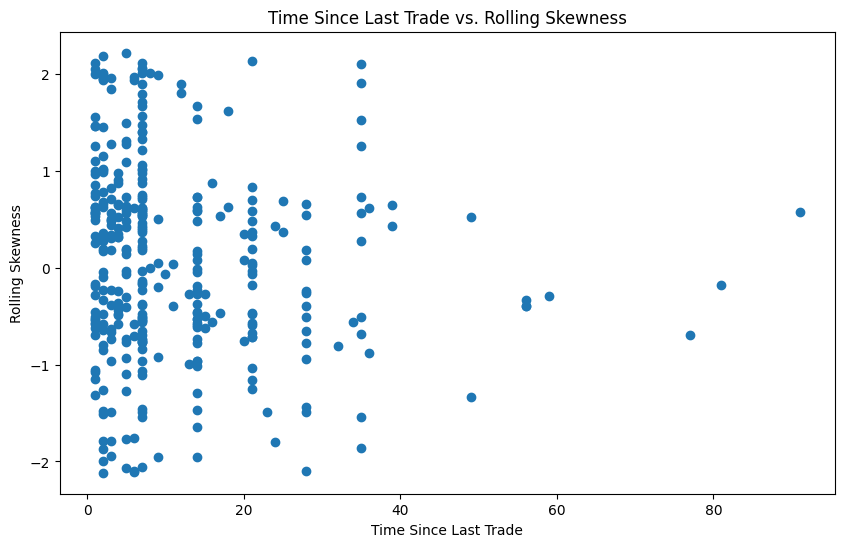

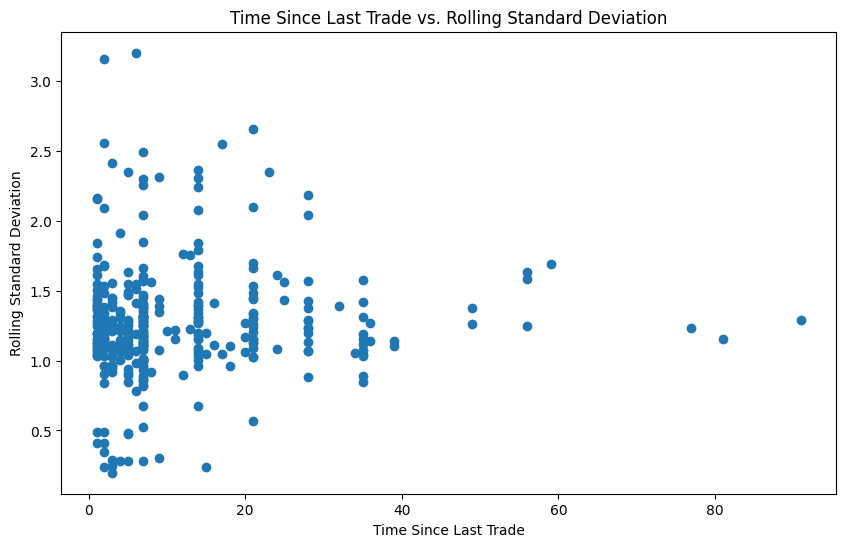

In [74]:
# create scatter plot of time since last trade vs. rolling skewness
plt.figure(figsize=(10, 6))
plt.scatter(df_roll["Time Since Last Trade"], df_roll["Rolling Skewness"])
plt.title("Time Since Last Trade vs. Rolling Skewness")
plt.xlabel("Time Since Last Trade")
plt.ylabel("Rolling Skewness")
plt.show()

# create scatter plot of time since last trade vs. rolling standard deviation
plt.figure(figsize=(10, 6))
plt.scatter(df_roll["Time Since Last Trade"], df_roll["Rolling Std"])
plt.title("Time Since Last Trade vs. Rolling Standard Deviation")
plt.xlabel("Time Since Last Trade")
plt.ylabel("Rolling Standard Deviation")
plt.show()